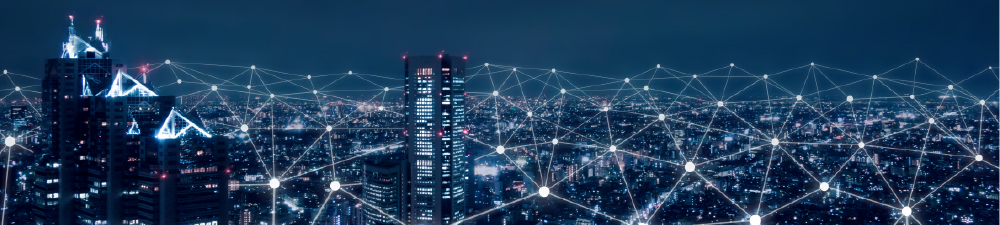

# Mini Project 2 - IU 4.5 Statistical Analysis

## Packages and setup

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

import os

from scipy.stats import shapiro
from scipy.stats import levene
from statsmodels.stats import weightstats as stests
import pylab
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

### Reading data and initial processing

In [2]:
#Read data using pandas
df=pd.read_csv("C:/Users/evanq/MiniProject2/Mini_project_2_Data.csv")

#Check data types of each column using "dtypes" function
print("Data types for the data set:")
df.dtypes

#Check dimension of data i.e. # of rows and #column using pandas "shape" funtion
print("Shape of the data i.e. no. of rows and columns")
df.shape

#display first 5 rows of the data using "head" function
print("First 5 rows of the raw data:")
df.head(5)

Data types for the data set:


userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object

Shape of the data i.e. no. of rows and columns


(90189, 5)

First 5 rows of the raw data:


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


## Exercise

## Q1. Detect and resolve problems in the data (Missing value, Outliers, etc.)

### Q1.1 Identify missing value

In [3]:
#Check for any missing values in the data using isnull() function
df.isnull().sum()


userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

### Q1.2 Identify outliers

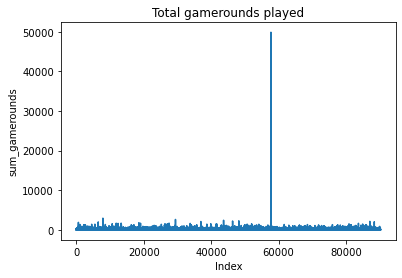

In [4]:
#Check for outlier values in sum_gamerounds column
plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(df.sum_gamerounds);

In [5]:
#Creating index column
df['Index'] = df.index
df.describe()

,userid,sum_gamerounds,Index
count,9.018900e+04,90189.000000,90189.000000
mean,4.998412e+06,51.872457,45094.000000
std,2.883286e+06,195.050858,26035.466051
min,1.160000e+02,0.000000,0.000000
25%,2.512230e+06,5.000000,22547.000000
50%,4.995815e+06,16.000000,45094.000000
75%,7.496452e+06,51.000000,67641.000000
max,9.999861e+06,49854.000000,90188.000000


Text(0.5, 0, 'Index')

Text(0, 0.5, 'Total gamerounds played')

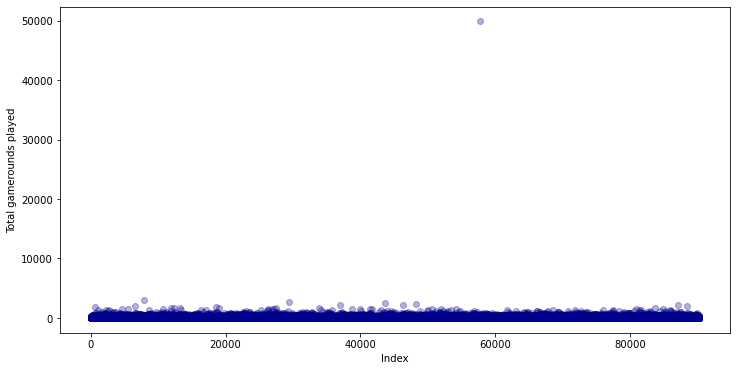

userid            9999861
version           gate_40
sum_gamerounds      49854
retention_1          True
retention_7          True
Index               90188
dtype: object

,userid,version,sum_gamerounds,retention_1,retention_7,Index
57702,6390605,gate_30,49854,False,True,57702


In [6]:
#Finding outlier using scatter plot
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df['Index'], df['sum_gamerounds'],color = 'darkblue',alpha=0.3)
ax.set_xlabel('Index')
ax.set_ylabel('Total gamerounds played')
plt.show()

#Based on the plot, filter out the outlier from sum_gamerounds played; Use max() function to find the index of the outlierr
df.max()
df[df['sum_gamerounds']>10000]

In [7]:
#Based on the plot, filter out the outlier from sum_gamerounds played

df = df.drop(57702)

#Alternate way of dropping the outlier
#outlier = df[(df['sum_gamerounds'] >= 30000)].index
#df.drop(outlier, inplace=True)

Text(0.5, 1.0, 'Total gamerounds played by users')

Text(0.5, 0, 'Total gamerounds played')

Text(0, 0.5, 'Users')

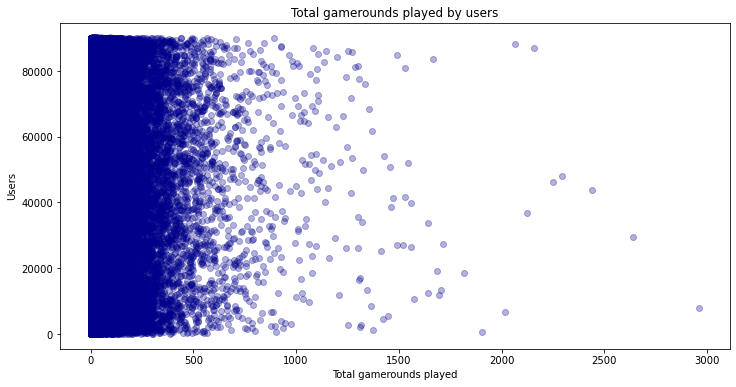

This chart shows the number of game rounds played by each unique user as y-axis. We can see that most users stopped before 500 game rounds.


In [8]:
#Plot the graph for sum_gamerounds player after removing the outlier
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df['sum_gamerounds'],df['Index'], alpha = 0.3,color = 'darkblue')
plt.title("Total gamerounds played by users")
ax.set_xlabel('Total gamerounds played')
ax.set_ylabel('Users')
plt.show();
print('This chart shows the number of game rounds played by each unique user as y-axis. We can see that most users stopped before 500 game rounds.')

Dropout occurs from Level 0 to 16, after which the players will continue with the game at very low drop out rate.


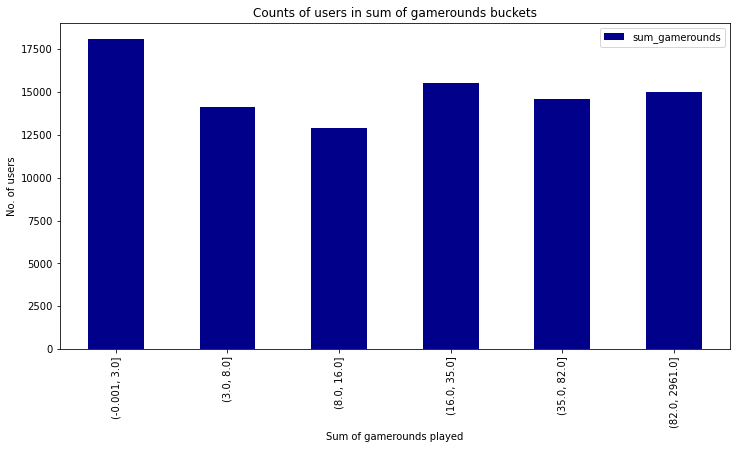

In [9]:
#Plot the graph for sum_gamerounds player after removing the outlier
#Creating buckets for sum of gamerounds played
df['Buckets'] = pd.qcut(df['sum_gamerounds'], q=6)
df_test_results = df.groupby(df['Buckets']).count()

#Plotting the figure
fig = df_test_results.plot(kind='bar', y = 'sum_gamerounds',figsize=(12, 6),color = 'darkblue')
fig.set_title('Counts of users in sum of gamerounds buckets')
fig.set_xlabel('Sum of gamerounds played')
fig.set_ylabel('No. of users')

print ('Dropout occurs from Level 0 to 16, after which the players will continue with the game at very low drop out rate.');

To understand the previous chart better, count of users has been plotted against the number of game rounds played. This chart shows that many users stopped after 0 to 4 game rounds. The sharp drop in users stabilised at around first 16 game rounds, and continue to slide slowly over number of game rounds thereafter.


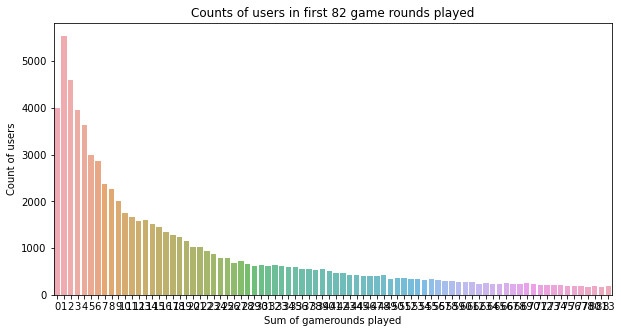

In [10]:
#Plot the graph for sum_gamerounds player after removing the outlier
user_count = df['sum_gamerounds'].value_counts()
user_count = user_count[:82]
fig = plt.figure(figsize=(10,5))
plt.title('Counts of users in first 82 game rounds played')
plt.xlabel('Sum of gamerounds played')
plt.ylabel('Count of users')
sns.barplot(user_count.index, user_count.values, alpha = 0.8)
print('To understand the previous chart better, count of users has been plotted against the number of game rounds played. This chart shows that many users stopped after 0 to 4 game rounds. The sharp drop in users stabilised at around first 16 game rounds, and continue to slide slowly over number of game rounds thereafter.');

## Q2. Plot summary statistics and identify trends to answer basis business questions

### Q2.1 What is the overall 7-day retention rate of the game?

In [11]:
#Insert calculation for 7-day retention rate
rr7 = df.groupby('retention_7').agg({'userid':'count','retention_7':'sum'})
rr7['rate'] = (rr7['retention_7']/rr7['userid'].sum(axis=0)).multiply(100).round(2)
rr7
rr7_rate=rr7.loc[1,'rate']
print("Overall 7 days retention rate of the game for both versions is: " ,rr7_rate,"%")


,userid,retention_7,rate
retention_7,,,
False,73408,0,0.00
True,16780,16780,18.61


Overall 7 days retention rate of the game for both versions is:  18.61 %


### Q2.2 How many players never played the game after installing? 

In [12]:
# Find number of customers with sum_gamerounds is equal to zero
zerogame_customers = (df['sum_gamerounds'] == 0).sum()
print(zerogame_customers, "customers did not play a single game.")

3994 customers did not play a single game.


### Q2.3 Does the number of users decrease as the level progresses highlighting the difficulty of the game?

There are 84917 users who played at least 200 gamerounds.

Below chart highlights that as the level progresses, the difficulty of the game increases as users start to slide off slowly over the game rounds played.


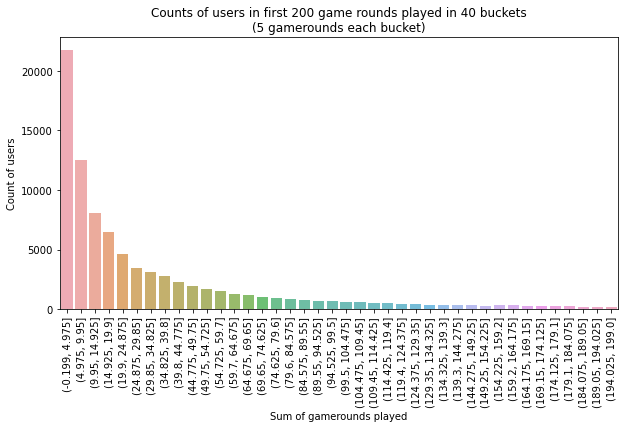

In [13]:
#Group by sum_gamerounds and count the number of users for the first 200 gamerounds
first200 = df.loc[(df['sum_gamerounds']<200)]
first200_users = first200.userid.count()
print("There are", first200_users, "users who played at least 200 gamerounds.")

#Use plot() function on the summarized stats to visualize the chart
first200['Buckets'] = pd.cut(first200['sum_gamerounds'], 40)
first200_users_model_df = first200['Buckets'].value_counts()
fig = plt.figure(figsize=(10,5))
plt.title('Counts of users in first 200 game rounds played in 40 buckets\n(5 gamerounds each bucket)')
plt.xlabel('Sum of gamerounds played')
plt.ylabel('Count of users')
plt.xticks(rotation=90)
sns.barplot(first200_users_model_df.index, first200_users_model_df.values, alpha = 0.8)
print('\nBelow chart highlights that as the level progresses, the difficulty of the game increases as users start to slide off slowly over the game rounds played.');

#fig, ax = plt.subplots(figsize=(12,6))
#plt.title("Histogram of gamerounds played by users")
#ax.set_xlabel('Sum of gamerounds played')
#ax = sns.distplot(first200['sum_gamerounds'],hist_kws={'edgecolor':'black'},color = 'darkblue');


## Q3. Generate crosstab for two groups of players to understand if there is a difference in 7 days retention rate & total number of game rounds played

### Q3.1 Seven days retention rate summary for different game versions (Generate cross tab for two player groups to understand the difference in the 1-day and 7-days retention rate & total number of game rounds played)

In [14]:
#Create cross tab for game version and retention_7 flag counting number of users for each possible categories

pd.crosstab(df.version, df.retention_7).apply(lambda r: r/r.sum(), axis=1)
pd.crosstab(df.version, df.retention_1).apply(lambda r: r/r.sum(), axis=1)
df.groupby('version').agg({'userid':'count','retention_7':'sum','retention_1':'sum','sum_gamerounds':'sum'})

retention_7,False,True
version,,
gate_30,0.809817,0.190183
gate_40,0.818000,0.182000


retention_1,False,True
version,,
gate_30,0.551802,0.448198
gate_40,0.557717,0.442283


,userid,retention_7,retention_1,sum_gamerounds
version,,,,
gate_30,44699,8501,20034,2294941
gate_40,45489,8279,20119,2333530


<mark>__Analsysis Results:__
    
The churn rate of both versions are similar at around 80% for retention_7. This implies that by reducing the gate level from level 40 to level 30 did not lift the churn rate.

### Q3.2 Gamerounds summary for different game versions

In [15]:
#use pandas groupby to calculate average game rounds played summarized by different versions
gv = df.groupby('version').agg({'sum_gamerounds' :'mean'})
gv


,sum_gamerounds
version,
gate_30,51.342111
gate_40,51.298776


<mark>__Analsysis Results:__
    
Do total number of gamerounds played in total by each player differ based on  different versions of the game? 
    
No, both game versions have an average of 51 gamerounds played by each player. This implies that there are no difference in retention rate even if the gate is increased to the 40th level.

## Q4. Perform two-sample test for groups A and B to test statistical significance amongst the groups in the sum of game rounds played i.e., if groups A and B are statistically different

### Initial data processing

In [16]:
#Define A/B groups for hypothesis testing, A = gate_30, B = gate_40
df["version"] = np.where(df.version == "gate_30", "A", "B")

group_A=pd.DataFrame(df[df.version=="A"]['sum_gamerounds'])
group_B=pd.DataFrame(df[df.version=="B"]['sum_gamerounds'])

### Q4.1 Shapiro test of Normality

Both samples are extremely positively(right) skewed.


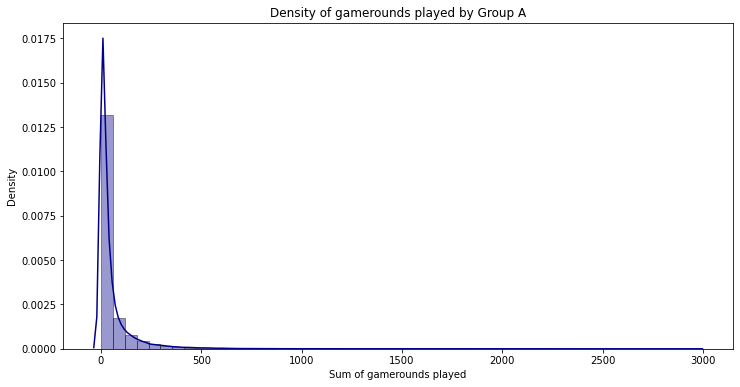

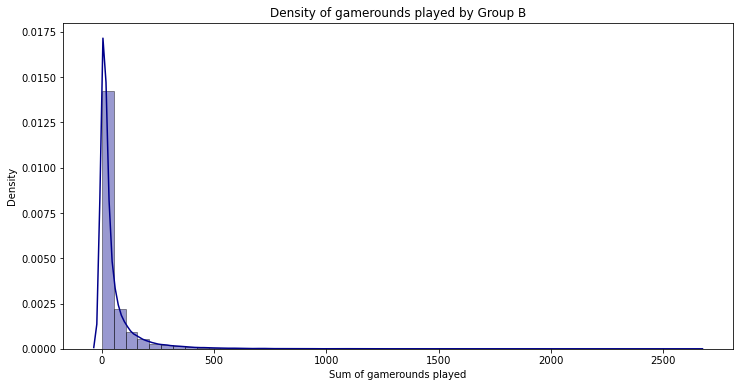

In [17]:
#Testing for skewness of data

fig, ax = plt.subplots(figsize=(12,6))
plt.title("Density of gamerounds played by Group A")
ax.set_xlabel('Sum of gamerounds played')
ax = sns.distplot(group_A,hist_kws={'edgecolor':'black'},color = 'darkblue')

fig, ax = plt.subplots(figsize=(12,6))
plt.title("Density of gamerounds played by Group B")
ax.set_xlabel('Sum of gamerounds played')
ax = sns.distplot(group_B,hist_kws={'edgecolor':'black'},color = 'darkblue',)

print('Both samples are extremely positively(right) skewed.');

In [18]:
#Preparing sample groups for Hypothesis Testing (n=50)
group_A_sample = group_A.sample(n=50)
group_B_sample = group_B.sample(n=50)

In [19]:
#---------------------- Shapiro Test ----------------------
# NULL Hypothesis H0: Distribution is normal
# ALTERNATE Hypothesis H1: Distribution is not normal    

#test for group_A
shapiro_stat, shapiro_p = shapiro(group_A_sample)
print('Group A shapiro test: stat=%.3f, p=%.3f' % (shapiro_stat, shapiro_p))
if shapiro_p > 0.05:
    print (shapiro_p,'is > 0.05, hence null hypothesis is accepted and distribution is normal.')
else:
    print (shapiro_p,'is < 0.05, hence failed to accept null hypothesis, and the distribution is not normal.')
    
    
#test for group_B
shapiro_stat, shapiro_p = shapiro(group_B_sample)
print('\nGroup B shapiro test: stat=%.3f, p=%.3f' % (shapiro_stat, shapiro_p))
if shapiro_p > 0.05:
    print (shapiro_p,'is > 0.05, hence null hypothesis is accepted and distribution is normal.')
else:
    print (shapiro_p,'is < 0.05, hence failed to accept null hypothesis, and the distribution is not normal.')

Group A shapiro test: stat=0.509, p=0.000
1.081582479828258e-11 is < 0.05, hence failed to accept null hypothesis, and the distribution is not normal.

Group B shapiro test: stat=0.592, p=0.000
1.4641264589609904e-10 is < 0.05, hence failed to accept null hypothesis, and the distribution is not normal.


<mark>__Analsysis Results:__
    
__Type your answer here:__ Analyze and interpret the results of shapiro test of normality i.e. are the two groups normally distributed?
    
Both versions of the game are not normally distributed. As visualized from the Q Q plot above, both groups are extremely positively (right) skewed.

### Q4.2 Test of homegienity of variance

In [20]:
#---------------------- Levene's Test ----------------------
# NULL Hypothesis H0: Two groups have equal variances
# ALTERNATE Hypothesis H1: Two groups do not have equal variances

#perform levene's test and accept or reject the null hypothesis based on the results
levene_stat, levene_p = levene(group_A_sample['sum_gamerounds'], group_B_sample['sum_gamerounds'])
print('Levene test: p=%.3f' % (levene_p))
if levene_p > 0.05:
    print (levene_p.round(3),'is > 0.05, hence the homogeneity of variance between group A and group B is assumed.')
else:
    print (levene_p.round(3),'is < 0.05, hence the variance of group A and group B is not homogeneous.')

Levene test: p=0.088
0.088 is > 0.05, hence the homogeneity of variance between group A and group B is assumed.


<mark>__Analsysis Results:__
    
__Type your answer here:__ Write your final recommendation from the results of Levene's test
    
The variance between group A and group B is homogeneous. This implies that the sum of gamerounds played by users from both groups are spread out equally from the mean and there are no differences among them. Therefore there are no difference if the gate is at Level 30 or Level 40.
    
Since Level 30 will be reached earlier by users, we recommend setting the gate at Level 30.

### Q4.3 Test of significance: Two sample test

In [21]:
#---------------------- Two samples test (variance is equal) ----------------------
# NULL Hypothesis H0: Two samples are equal
# ALTERNATE Hypothesis H1: Two samples are different

#Apply relevant two sample test to accept or reject the NULL hypothesis

ztest_stat ,ztest_p = stests.ztest(group_A_sample, x2=group_B_sample,value=0,alternative='two-sided')
print('Two sample Z-Test assuming equal variance: p=%.3f' % (ztest_p))
if ztest_p > 0.05:
    print (ztest_p.round(3),'is > 0.05, hence two samples are equal.')
else:
    print (ztest_p.round(3),'is < 0.05, hence two samples are different')

Two sample Z-Test assuming equal variance: p=0.096
[0.096] is > 0.05, hence two samples are equal.


<mark>__Analsysis Results:__
    
__Type your answer here:__ Write your final recommendation from the results of two sample hyothesis testing
    
We recommend using Level 30 for the first gate as users will reach Level 30 earlier than Level 40, as there are no difference in the samples between version A (Gate 30) and version B (Gate 40), this will generate profits for the company earlier from new users.

## Q5. Based on significance testing results, if groups A and B are statistically different, which level has more advantage in terms of player retention and number of game rounds played

In [22]:
#Analyze the 1 day and 7 days retention rate for two different groups using group by function

v = df.groupby("version").agg({'userid':'count','retention_1':'sum','retention_7':'sum'})
v['Retention Rate for 1 day'] = (v.retention_1/v.userid).multiply(100).round(2)
v['Retention Rate for 7 days'] = (v.retention_7/v.userid).multiply(100).round(2)
v[['userid','Retention Rate for 1 day','Retention Rate for 7 days']]

,userid,Retention Rate for 1 day,Retention Rate for 7 days
version,,,
A,44699,44.82,19.02
B,45489,44.23,18.20


<mark>__Analsysis Results:__
    
__Type your answer here:__ Write your final recommendation to the company regarding which level works best as the first gate  - Level 30 or Level 40
    
We recommend using Level 30 for the first gate as it will be reached earlier than Level 40, as there are no difference in the retention rate of users for version A (Gate 30) and version B (Gate 40) either over 1 day or 7 days, decreasing the gate level to Level 30 will generate profits for the company faster from the new users.

## Q6. [Bonus Question]  Using bootstrap resampling, plot the retention rate distribution for both the groups inorder to visualize effect of different version of the game on retention.

In [23]:
boot_A_r1=pd.DataFrame(df[df.version=="A"]['retention_1'])
boot_B_r1=pd.DataFrame(df[df.version=="B"]['retention_1'])
boot_A_r7=pd.DataFrame(df[df.version=="A"]['retention_7'])
boot_B_r7=pd.DataFrame(df[df.version=="B"]['retention_7'])

In [24]:
#1 day retention rate bootstrap resampling for both groups
boot_A_r1_sample = []
for i in range(500):
    a1_y = [random.sample(boot_A_r1.retention_1.tolist(), 50)]
    a1_r1 = np.mean(a1_y)
    boot_A_r1_sample.append(a1_r1)
    
boot_B_r1_sample = []
for i in range(500):
    b1_y = [random.sample(boot_B_r1.retention_1.tolist(), 50)]
    b1_r1 = np.mean(b1_y)
    boot_B_r1_sample.append(b1_r1)

#7 day retention rate bootstrap resampling for both groups
boot_A_r7_sample = []
for i in range(500):
    a7_y = [random.sample(boot_A_r7.retention_7.tolist(), 50)]
    a7_r7 = np.mean(a7_y)
    boot_A_r7_sample.append(a7_r7)
    
boot_B_r7_sample = []
for i in range(500):
    b7_y = [random.sample(boot_B_r7.retention_7.tolist(), 50)]
    b7_r7 = np.mean(b7_y)
    boot_B_r7_sample.append(b7_r7)

Group A total population 1 day retention rate:  0.45
Group B total population 1 day retention rate:  0.44

Bootstrap resampling was done by drawing 50 samples out of each group repeatedly for 500 times. We can observe that both groups are highly similar to each other, and bootstrap resampling proved the total population 1 day retention rate of around 45% as well.


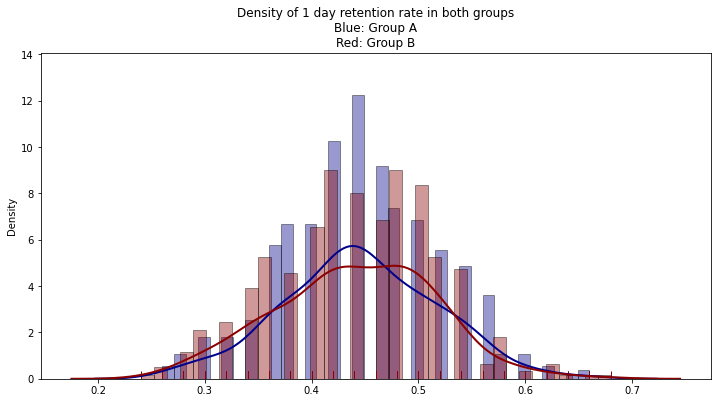

In [25]:
#plotting 1 day retention density chart
boot_A_r1_mean = np.mean(boot_A_r1['retention_1']).round(2)
boot_B_r1_mean = np.mean(boot_B_r1['retention_1']).round(2)
print('Group A total population 1 day retention rate: ',boot_A_r1_mean)
print('Group B total population 1 day retention rate: ',boot_B_r1_mean)

fig, ax = plt.subplots(figsize=(12,6))
plt.title("Density of 1 day retention rate in both groups\nBlue: Group A\nRed: Group B")
sns.distplot(boot_A_r1_sample, hist=True, rug=True, kde=True,bins=int(180/5), color = 'darkblue', hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 2}, )
sns.distplot(boot_B_r1_sample, hist=True, rug=True, kde=True,bins=int(180/5), color = 'darkred', hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 2}, )
print('\nBootstrap resampling was done by drawing 50 samples out of each group repeatedly for 500 times. We can observe that both groups are highly similar to each other, and bootstrap resampling proved the total population 1 day retention rate of around 45% as well.');

Group A total population 7 day retention rate:  0.19
Group B total population 7 day retention rate:  0.18

Bootstrap resampling was done by drawing 50 samples out of each group repeatedly for 500 times. We can observe that both groups are highly similar to each other, and bootstrap resampling proved the total population 7 day retention rate of around 19% as well.


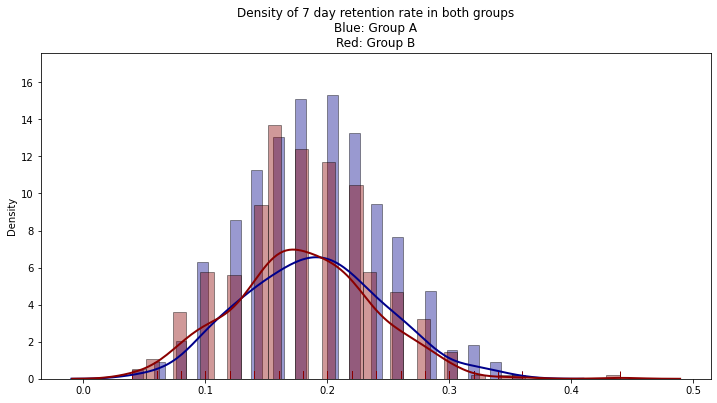

In [26]:
#plotting 7 day retention density chart
boot_A_r7_mean = np.mean(boot_A_r7['retention_7']).round(2)
boot_B_r7_mean = np.mean(boot_B_r7['retention_7']).round(2)
print('Group A total population 7 day retention rate: ',boot_A_r7_mean)
print('Group B total population 7 day retention rate: ',boot_B_r7_mean)

fig, ax = plt.subplots(figsize=(12,6))
plt.title("Density of 7 day retention rate in both groups\nBlue: Group A\nRed: Group B")
sns.distplot(boot_A_r7_sample, hist=True, rug=True, kde=True,bins=int(180/5), color = 'darkblue', hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 2}, )
sns.distplot(boot_B_r7_sample, hist=True, rug=True, kde=True,bins=int(180/5), color = 'darkred', hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 2}, )
print('\nBootstrap resampling was done by drawing 50 samples out of each group repeatedly for 500 times. We can observe that both groups are highly similar to each other, and bootstrap resampling proved the total population 7 day retention rate of around 19% as well.');

In [27]:
#Bootstrap resampling for Group A gamerounds played
group_A_sample_mean = []
for i in range(500):
    y = random.sample(group_A['sum_gamerounds'].tolist(), 20)
    avg = np.mean(y)
    group_A_sample_mean.append(avg)
    
#Bootstrap resampling for Group B gamerounds played
group_B_sample_mean = []
for i in range(500):
    y = random.sample(group_B['sum_gamerounds'].tolist(), 20)
    avg = np.mean(y)
    group_B_sample_mean.append(avg)


Group A average gamerounds played:  51
Group B average gamerounds played:  51

Below density chart is plotted by randomly selecting 20 samples from each group, repeated 1000 times and analyzed. We can observe that the average gamerounds played is positively skewed, implying that as users reaches the average gamerounds of 51, the number of users continuing the game starts to drop off slowly thereafter.


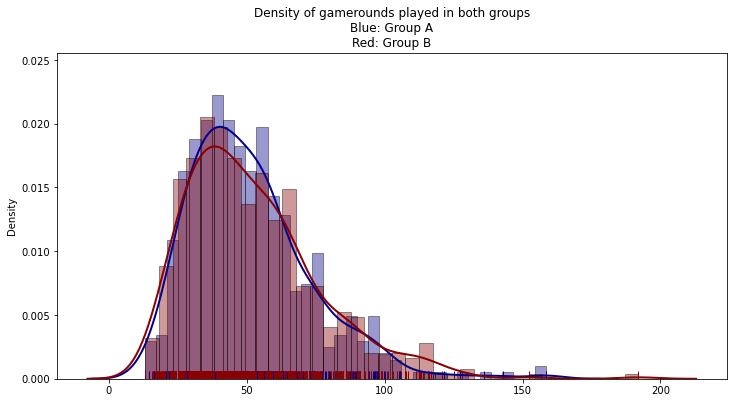

In [28]:
#Hint: Plot density function
group_A_gr_mean = int(np.mean(group_A['sum_gamerounds']))
group_B_gr_mean = int(np.mean(group_B['sum_gamerounds']))
print('Group A average gamerounds played: ',group_A_gr_mean)
print('Group B average gamerounds played: ',group_B_gr_mean)

fig, ax = plt.subplots(figsize=(12,6))
sns.distplot(group_A_sample_mean, hist=True, rug=True, kde=True,bins=int(180/5), color = 'darkblue', hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 2}, )
plt.title("Histogram of gamerounds played in Group A");

sns.distplot(group_B_sample_mean, hist=True, rug=True, kde=True,bins=int(180/5), color = 'darkred', hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 2});
plt.title("Density of gamerounds played in both groups\nBlue: Group A\nRed: Group B");

print('\nBelow density chart is plotted by randomly selecting 20 samples from each group, repeated 1000 times and analyzed. We can observe that the average gamerounds played is positively skewed, implying that as users reaches the average gamerounds of 51, the number of users continuing the game starts to drop off slowly thereafter.');